In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
# Add 'overweight' column
df['overweight'] = df['weight'] / (df['height'] / 100) ** 2
df.loc[df['overweight'] <= 25, 'overweight'] = int(0)
df.loc[df['overweight'] > 25, 'overweight'] = int(1)
df = df.astype({'overweight':'int8'})

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [5]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [6]:
corr = df_heat.corr()

In [8]:
mask = np.triu(np.ones_like(corr, dtype = bool))

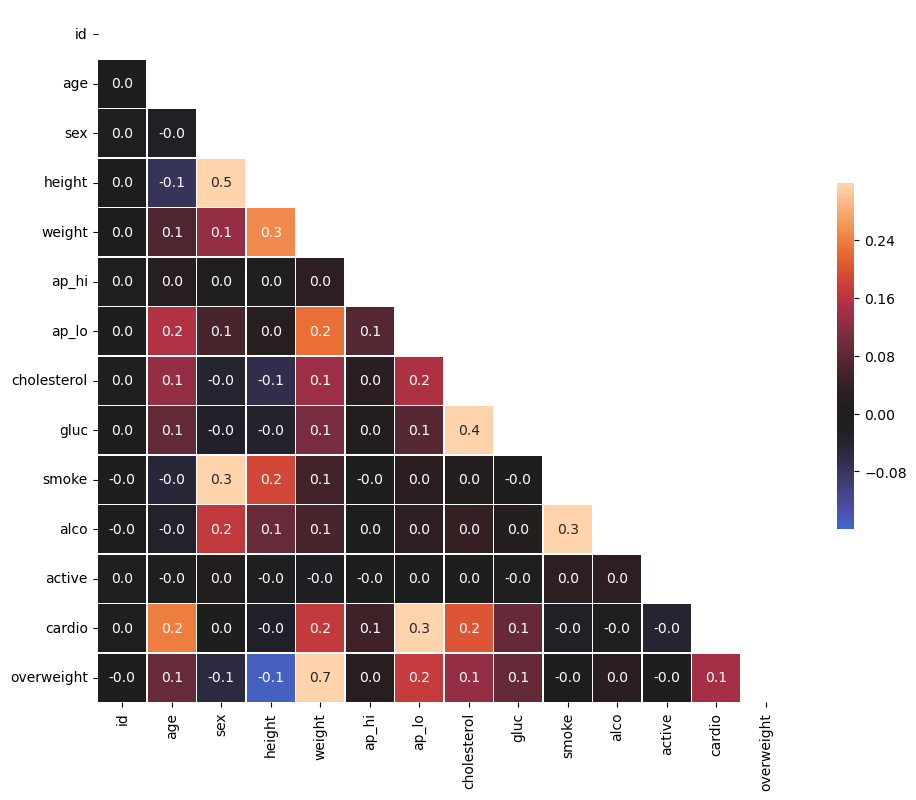

In [26]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, mask = mask, vmin = -0.16, vmax = 0.32, center = 0, square = True, linewidths = .5, linecolor = 'white', annot = True, fmt = '.1f', ax = ax, cbar_kws = {'ticks': [-0.08, 0.00, 0.08, 0.16, 0.24], "shrink": 0.5})